In [1]:
import pandas as pd
import numpy as np
import tqdm
import datetime

In [2]:
isins = pd.read_csv("Q:/MSK1_QR/HistoricalData/market_data_spx/isin.txt", index_col=0)

# MARKET DATA

In [12]:
import glob
path = '../MarketData_raw/NA/'
files = glob.glob(path + '*.csv')
tickers = list(map(lambda f: f[21:-4], files))
print(' '.join(tickers[:10]))

AN8068571086 BMG491BT1088 BMG6359F1032 BMG812761002 BMG982941046 CH0044328745 CH0048265513 CH0102993182 CH0114405324 GB00B4VLR192


In [13]:
market_data = pd.DataFrame()
for filename, sym in zip(files, tickers):
    mdf = pd.read_csv(filename, index_col=['Date'], parse_dates=['Date'], usecols=['Date', 'Close'])
    market_data = pd.concat([market_data, mdf], axis=1) 

In [14]:
market_data.columns = tickers

In [17]:
na_market_data= market_data.apply(lambda series: series.loc[:series.last_valid_index()].ffill())
na_market_data.ix[1:, :].to_csv('../un_spx_daily_nonadjusted_close.csv')

In [18]:
#na_market_data #.shape

In [20]:
import glob
path = '../MarketData_raw/A/'
files = glob.glob(path + '*.csv')
tickers = list(map(lambda f: f[20:-4], files))

print(' '.join(tickers[:10]))

AN8068571086 BMG491BT1088 BMG6359F1032 BMG812761002 BMG982941046 CH0044328745 CH0048265513 CH0102993182 CH0114405324 GB00B4VLR192


In [21]:
market_data = pd.DataFrame()
for filename, sym in zip(files, tickers):
    mdf = pd.read_csv(filename, index_col=[0], parse_dates=[0], usecols=[0, 4])
    market_data = pd.concat([market_data, mdf], axis=1) 

In [22]:
market_data.columns = tickers
market_data.index.name = 'Date'

In [23]:
market_data = market_data.loc[market_data.index <= na_market_data.index[-1]]

In [24]:
market_data

,AN8068571086,BMG491BT1088,BMG6359F1032,BMG812761002,BMG982941046,CH0044328745,CH0048265513,CH0102993182,CH0114405324,GB00B4VLR192,...,US98389B1008,US9839191015,US9841211033,US98419M1009,US9843321061,US9884981013,US98956P1021,US9897011071,US98978V1035,VGG607541015
Date,,,,,,,,,,,,,,,,,,,,,
2006-01-03,38.5100,8.10213,38.325,30.5946,59.43,34.67,95.8597,NaN,17.8300,38.175,...,6.445,16.350,7.7954,NaN,40.9100,4.3779,64.00,70.5500,NaN,NaN
2006-01-04,39.2000,8.34213,38.800,30.9146,60.83,35.60,97.1462,NaN,16.9200,39.225,...,6.535,17.510,7.7823,NaN,40.9700,4.5217,64.65,71.0900,NaN,NaN
2006-01-05,38.9300,8.85213,37.725,31.8746,60.70,35.47,95.3452,NaN,16.1150,38.205,...,6.525,19.130,7.6769,NaN,41.5300,5.2444,63.92,71.7900,NaN,NaN
2006-01-06,40.5700,9.16213,38.425,31.7146,60.81,36.19,98.4041,NaN,17.5400,39.695,...,6.595,19.700,7.6176,NaN,43.2100,5.1940,63.57,72.6000,NaN,NaN
2006-01-09,39.8300,9.15213,38.050,31.4946,61.28,36.03,98.5041,NaN,17.6200,39.725,...,6.545,19.670,7.7493,NaN,43.4200,5.3306,65.98,71.9500,NaN,NaN
2006-01-10,40.4100,9.05213,38.710,31.3746,60.55,36.17,100.6196,NaN,16.5250,40.625,...,6.635,19.830,7.6966,NaN,42.9800,5.3163,65.68,71.0400,NaN,NaN
2006-01-11,40.4550,9.33213,38.725,30.5146,62.55,36.79,100.0479,NaN,16.1100,40.805,...,6.495,19.640,7.9338,NaN,41.8700,5.1904,67.51,71.4900,NaN,NaN
2006-01-12,39.5350,9.43213,37.910,29.3980,62.49,35.54,98.1039,NaN,15.9950,39.555,...,6.685,19.390,8.0787,NaN,40.8900,4.9064,67.94,70.3200,NaN,NaN
2006-01-13,40.4700,9.39213,38.065,29.1946,62.33,35.03,99.9764,NaN,15.6200,40.585,...,6.695,19.370,7.8547,NaN,39.9000,4.9028,66.12,71.1100,NaN,NaN


In [25]:
market_data.loc['2012-10-29'].index

Index(['AN8068571086', 'BMG491BT1088', 'BMG6359F1032', 'BMG812761002',
       'BMG982941046', 'CH0044328745', 'CH0048265513', 'CH0102993182',
       'CH0114405324', 'GB00B4VLR192',
       ...
       'US98389B1008', 'US9839191015', 'US9841211033', 'US98419M1009',
       'US9843321061', 'US9884981013', 'US98956P1021', 'US9897011071',
       'US98978V1035', 'VGG607541015'],
      dtype='object', length=768)

In [26]:
market_data=market_data.drop(datetime.datetime.strptime('2012-10-29', '%Y-%m-%d'), axis=0)

In [27]:
market_data

,AN8068571086,BMG491BT1088,BMG6359F1032,BMG812761002,BMG982941046,CH0044328745,CH0048265513,CH0102993182,CH0114405324,GB00B4VLR192,...,US98389B1008,US9839191015,US9841211033,US98419M1009,US9843321061,US9884981013,US98956P1021,US9897011071,US98978V1035,VGG607541015
Date,,,,,,,,,,,,,,,,,,,,,
2006-01-03,38.5100,8.10213,38.325,30.5946,59.43,34.67,95.8597,NaN,17.8300,38.175,...,6.445,16.350,7.7954,NaN,40.9100,4.3779,64.00,70.5500,NaN,NaN
2006-01-04,39.2000,8.34213,38.800,30.9146,60.83,35.60,97.1462,NaN,16.9200,39.225,...,6.535,17.510,7.7823,NaN,40.9700,4.5217,64.65,71.0900,NaN,NaN
2006-01-05,38.9300,8.85213,37.725,31.8746,60.70,35.47,95.3452,NaN,16.1150,38.205,...,6.525,19.130,7.6769,NaN,41.5300,5.2444,63.92,71.7900,NaN,NaN
2006-01-06,40.5700,9.16213,38.425,31.7146,60.81,36.19,98.4041,NaN,17.5400,39.695,...,6.595,19.700,7.6176,NaN,43.2100,5.1940,63.57,72.6000,NaN,NaN
2006-01-09,39.8300,9.15213,38.050,31.4946,61.28,36.03,98.5041,NaN,17.6200,39.725,...,6.545,19.670,7.7493,NaN,43.4200,5.3306,65.98,71.9500,NaN,NaN
2006-01-10,40.4100,9.05213,38.710,31.3746,60.55,36.17,100.6196,NaN,16.5250,40.625,...,6.635,19.830,7.6966,NaN,42.9800,5.3163,65.68,71.0400,NaN,NaN
2006-01-11,40.4550,9.33213,38.725,30.5146,62.55,36.79,100.0479,NaN,16.1100,40.805,...,6.495,19.640,7.9338,NaN,41.8700,5.1904,67.51,71.4900,NaN,NaN
2006-01-12,39.5350,9.43213,37.910,29.3980,62.49,35.54,98.1039,NaN,15.9950,39.555,...,6.685,19.390,8.0787,NaN,40.8900,4.9064,67.94,70.3200,NaN,NaN
2006-01-13,40.4700,9.39213,38.065,29.1946,62.33,35.03,99.9764,NaN,15.6200,40.585,...,6.695,19.370,7.8547,NaN,39.9000,4.9028,66.12,71.1100,NaN,NaN


In [28]:
market_data.ix[1:, :].apply(lambda series: series.loc[:series.last_valid_index()].ffill()).to_csv('../un_spx_daily_adjusted_close.csv')

In [29]:
market_data.apply(lambda series: series.loc[:series.last_valid_index()])\
                  .ffill().diff().ix[1:, :].to_csv('../un_spx_adjusted_returns.csv')

In [31]:
df = pd.DataFrame(np.array(market_data.apply(lambda series: series.loc[:series.last_valid_index()])\
                  .ffill().diff().ix[1:, :]) /\
    np.array(na_market_data.ix[:-1, :]), index=na_market_data.index[1:])

df.columns = tickers

df.to_csv('../un_spx_adjusted_pct_returns.csv')

In [32]:
df

,AN8068571086,BMG491BT1088,BMG6359F1032,BMG812761002,BMG982941046,CH0044328745,CH0048265513,CH0102993182,CH0114405324,GB00B4VLR192,...,US98389B1008,US9839191015,US9841211033,US98419M1009,US9843321061,US9884981013,US98956P1021,US9897011071,US98978V1035,VGG607541015
Date,,,,,,,,,,,,,,,,,,,,,
2006-01-04,0.013351,0.015123,0.012110,0.008252,0.020519,0.017052,0.012304,NaN,-0.027019,0.021672,...,0.004847,0.045014,-0.001334,NaN,0.001467,0.008556,0.009492,0.007061,NaN,NaN
2006-01-05,-0.005156,0.031657,-0.027078,0.024552,-0.001867,-0.002344,-0.017015,NaN,-0.024565,-0.020606,...,-0.000536,0.060156,-0.010747,NaN,0.013669,0.042633,-0.010560,0.009089,NaN,NaN
2006-01-06,0.031478,0.018652,0.018123,-0.003994,0.001583,0.013010,0.029400,NaN,0.044580,0.030734,...,0.003753,0.019965,-0.006112,NaN,0.040453,-0.002852,-0.005117,0.010422,NaN,NaN
2006-01-09,-0.013770,-0.000591,-0.009536,-0.005514,0.006752,-0.002854,0.000934,NaN,0.002396,0.000600,...,-0.002671,-0.001030,0.013658,NaN,0.004860,0.007751,0.035415,-0.008277,NaN,NaN
2006-01-10,0.010943,-0.005910,0.016945,-0.003024,-0.010417,0.002504,0.019733,NaN,-0.032716,0.018000,...,0.004821,0.005500,-0.005392,NaN,-0.010134,-0.000805,-0.004258,-0.011685,NaN,NaN
2006-01-11,0.000840,0.016647,0.000379,-0.021739,0.028839,0.011064,-0.005230,NaN,-0.012819,0.003536,...,-0.007463,-0.006496,0.024399,NaN,-0.025826,-0.007094,0.026083,0.005846,NaN,NaN
2006-01-12,-0.017156,0.005848,-0.020568,-0.028853,-0.000841,-0.022061,-0.017876,NaN,-0.003598,-0.024471,...,0.010204,-0.008603,0.014550,NaN,-0.023406,-0.016170,0.005973,-0.015112,NaN,NaN
2006-01-13,0.017740,-0.002326,0.003994,-0.005412,-0.002244,-0.009204,0.017532,NaN,-0.011776,0.020670,...,0.000532,-0.000694,-0.022170,NaN,-0.024211,-0.000208,-0.025131,0.010361,NaN,NaN
2006-01-17,0.011372,-0.005245,0.019248,-0.036918,-0.002812,-0.000729,0.024333,NaN,-0.024471,0.022611,...,0.011158,-0.013546,-0.024667,NaN,0.005263,-0.012278,0.001416,-0.004803,NaN,NaN


# MARKET CAPs

In [38]:
import glob
path = '../MarketData_raw/NA/'
files = glob.glob(path + '*.csv')
tickers = list(map(lambda f: f[21:-4], files))
print(' '.join(tickers[:10]))

AN8068571086 BMG491BT1088 BMG6359F1032 BMG812761002 BMG982941046 CH0044328745 CH0048265513 CH0102993182 CH0114405324 GB00B4VLR192


In [39]:
import glob
path = 'Q:/MSK1_Transfer/MARKET_CAP/'
files = glob.glob(path + '*.csv')
tickers = list(map(lambda f: f[28:-4], files))
print(' '.join(tickers[:10]))

AN8068571086 BMG491BT1088 BMG6359F1032 BMG812761002 BMG982941046 CH0044328745 CH0048265513 CH0102993182 CH0114405324 GB00B4VLR192


In [40]:
market_cap = pd.DataFrame()
for filename, sym in zip(files, tickers):
    mdf = pd.read_csv(filename, index_col=['Date'], parse_dates=['Date'], usecols=['Date', 'CUR_MKT_CAP'])
    market_cap = pd.concat([market_cap, mdf], axis=1) 

In [41]:
market_cap#.shape

,CUR_MKT_CAP,CUR_MKT_CAP,CUR_MKT_CAP,CUR_MKT_CAP,CUR_MKT_CAP,CUR_MKT_CAP,CUR_MKT_CAP,CUR_MKT_CAP,CUR_MKT_CAP,CUR_MKT_CAP,...,CUR_MKT_CAP,CUR_MKT_CAP,CUR_MKT_CAP,CUR_MKT_CAP,CUR_MKT_CAP,CUR_MKT_CAP,CUR_MKT_CAP,CUR_MKT_CAP,CUR_MKT_CAP,CUR_MKT_CAP
Date,,,,,,,,,,,,,,,,,,,,,
2017-05-19,100238.3859,12726.4773,2903.7354,4020.1224,11017.1524,64552.4393,4148.9917,26509.8884,9693.7972,2288.3914,...,23189.5298,16551.1359,7151.6713,9361.4281,48542.361,24428.3684,23656.8773,8155.8293,29541.0624,5890.2559


In [26]:
ideal = market_data.ix[:, 0]
ideal.name='ideal'
market_cap = pd.concat([ideal, market_cap], axis=1).ix[1:, :].drop('ideal', axis=1)


NameError: name 'market_data' is not defined

In [42]:
market_cap.columns=tickers

In [ ]:
market_cap=market_cap.apply(lambda series: series.loc[:series.last_valid_index()].ffill())

In [44]:
market_cap.to_csv('../un_spx_market_cap.csv')

In [27]:
market_cap

,CUR_MKT_CAP,CUR_MKT_CAP,CUR_MKT_CAP,CUR_MKT_CAP,CUR_MKT_CAP,CUR_MKT_CAP,CUR_MKT_CAP,CUR_MKT_CAP,CUR_MKT_CAP,CUR_MKT_CAP,...,CUR_MKT_CAP,CUR_MKT_CAP,CUR_MKT_CAP,CUR_MKT_CAP,CUR_MKT_CAP,CUR_MKT_CAP,CUR_MKT_CAP,CUR_MKT_CAP,CUR_MKT_CAP,CUR_MKT_CAP
Date,,,,,,,,,,,,,,,,,,,,,
2017-05-19,100238.3859,12726.4773,2903.7354,4020.1224,11017.1524,64552.4393,4148.9917,26509.8884,9693.7972,2288.3914,...,23189.5298,16551.1359,7151.6713,9361.4281,48542.361,24428.3684,23656.8773,8155.8293,29541.0624,5890.2559


# FRAC FACTOR

In [28]:
in_spx_mask = pd.read_csv('../in_spx_mask.csv', parse_dates=['Date'], index_col='Date')

In [29]:
in_spx_mask

,AN8068571086,BMG491BT1088,BMG6359F1032,BMG812761002,BMG982941046,CH0044328745,CH0048265513,CH0102993182,CH0114405324,GB00B4VLR192,...,US98389B1008,US9839191015,US9841211033,US98419M1009,US9843321061,US9884981013,US98956P1021,US9897011071,US98978V1035,VGG607541015
Date,,,,,,,,,,,,,,,,,,,,,
2006-01-04,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
2006-01-05,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
2006-01-06,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
2006-01-09,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
2006-01-10,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
2006-01-11,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
2006-01-12,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
2006-01-13,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
2006-01-17,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0


In [30]:
in_spx_mask.shape, market_cap.shape

((2863, 768), (1, 768))

In [31]:
ideal = market_cap.ix[:, 0].copy() #in_spx_mask
ideal = pd.DataFrame(ideal)
ideal.columns = ['ideal']
#ideal

In [32]:
in_spx_mask = pd.concat([ideal, in_spx_mask], axis=1).drop('ideal', axis=1)
in_spx_mask.ffill(inplace=True)

In [43]:
ideal = in_spx_mask.ix[:, 0].copy() #in_spx_mask
ideal = pd.DataFrame(ideal)
ideal.columns = ['ideal']
#ideal

In [44]:
market_cap = pd.concat([market_cap, ideal], axis=1).bfill().drop('ideal', axis=1)

In [90]:
in_spx_mask.to_csv('../in_spx_mask.csv')

In [118]:
market_cap['US0378331005']

Date
2006-01-04    801315.0823
2006-01-05    801315.0823
2006-01-06    801315.0823
2006-01-09    801315.0823
2006-01-10    801315.0823
2006-01-11    801315.0823
2006-01-12    801315.0823
2006-01-13    801315.0823
2006-01-17    801315.0823
2006-01-18    801315.0823
2006-01-19    801315.0823
2006-01-20    801315.0823
2006-01-23    801315.0823
2006-01-24    801315.0823
2006-01-25    801315.0823
2006-01-26    801315.0823
2006-01-27    801315.0823
2006-01-30    801315.0823
2006-01-31    801315.0823
2006-02-01    801315.0823
2006-02-02    801315.0823
2006-02-03    801315.0823
2006-02-06    801315.0823
2006-02-07    801315.0823
2006-02-08    801315.0823
2006-02-09    801315.0823
2006-02-10    801315.0823
2006-02-13    801315.0823
2006-02-14    801315.0823
2006-02-15    801315.0823
                 ...     
2017-04-07    801315.0823
2017-04-10    801315.0823
2017-04-11    801315.0823
2017-04-12    801315.0823
2017-04-13    801315.0823
2017-04-17    801315.0823
2017-04-18    801315.0823
2017-04

In [119]:
market_cap_arr, in_spx_mask_arr = map(lambda df: np.array(df), [market_cap, in_spx_mask])

In [104]:
market_cap_arr[in_spx_mask_arr==0]=np.nan

In [120]:
market_cap_arr.shape

(2864, 768)

In [121]:
market_cap_of_spx = np.nansum(market_cap_arr, axis=1, keepdims=True, dtype='float32')

In [122]:
market_cap_of_spx

array([[ 22992732.],
       [ 22992732.],
       [ 22992732.],
       ..., 
       [ 22992732.],
       [ 22992732.],
       [ 22992732.]], dtype=float32)

In [123]:
market_cap_arr.shape, market_cap_of_spx.shape

((2864, 768), (2864, 1))

In [124]:
market_cap_arr

array([[ 100238.3859,   12726.4773,    2903.7354, ...,    8155.8293,
          29541.0624,    5890.2559],
       [ 100238.3859,   12726.4773,    2903.7354, ...,    8155.8293,
          29541.0624,    5890.2559],
       [ 100238.3859,   12726.4773,    2903.7354, ...,    8155.8293,
          29541.0624,    5890.2559],
       ..., 
       [ 100238.3859,   12726.4773,    2903.7354, ...,    8155.8293,
          29541.0624,    5890.2559],
       [ 100238.3859,   12726.4773,    2903.7354, ...,    8155.8293,
          29541.0624,    5890.2559],
       [ 100238.3859,   12726.4773,    2903.7354, ...,    8155.8293,
          29541.0624,    5890.2559]])

In [125]:
frac_factor = market_cap_arr / market_cap_of_spx
frac_factor = pd.DataFrame(frac_factor, index=market_cap.index).apply(lambda series: series.loc[:series.last_valid_index()].ffill())
frac_factor.columns = tickers
#frac_factor.to_csv('../Features/FRAC_FACTOR.csv')

In [127]:
frac_factor.tail(1).to_csv('Q:/MSK1_Transfer/fracc.csv')

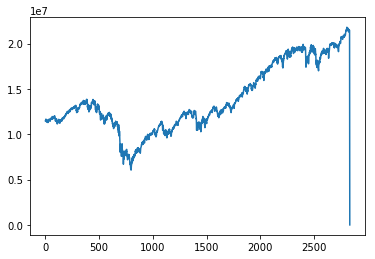

In [194]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.plot(market_cap_of_spx)

In [84]:
spy_a = pd.read_csv('../SPY_adjusted.csv', parse_dates=['Date'], index_col='Date')
spy_na = pd.read_csv('../SPY_nonadjusted.csv', parse_dates=['Date'], index_col='Date')

In [86]:
(spy_a.diff()[1:] / np.array(spy_na[:-1])).to_csv('../spy_adjusted_percent_returns.csv')